# Stochastic Synchronization in a Recurrent Neural Network

This is a helping notebook that takes you over the main functions and analysis methods used in our model

-----------------------------------

First, let's import all the modules we will be using throughout the tutorial:

In [10]:
# Import helping libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import tables
from brian2 import *
from HelpingFuncs.peakdetect import peakdet
from HelpingFuncs.peakfinders import *
from HelpingFuncs.FreqAnalysis import comp_mtspectrogram

# Import model-related functions and variables
from Network_utils import *

Now let's use the main function used to build and run a simulation of our RNN model 'sim_network()'. Simply calling the function without specifying any parameter values will run a short simulation of the model with default parameters. Please refer to the file 'Network_utils.py' to see these parameters or simply type 'sim_network?'
In the following example we will simulate the model, monitor the membrane potential of every neruron and save the raw data in an hdf5 file.

Setting up the network...
Running 1. s simulation of the network...
Simulating 1. s took 4.06311071714 minutes!
Saved raw data successfullty!


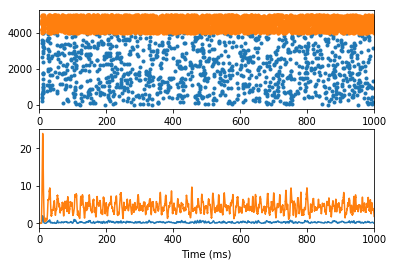

In [19]:
monitors_dict = sim_network(save_raw=True, filename='Tutorial1', PlotFlag=True)

The output returned by the function 'run_network' is a dictionary of all the monitors (brian objects) used during the simulations to record data. These objects contain the raw data inside them.
The function 'analyze_network()' takes as input the dictionary returned by 'run_network()' in addition to other method-related parameters and returns a dictionary of features computed from the raw data. Run the code below to see an example:

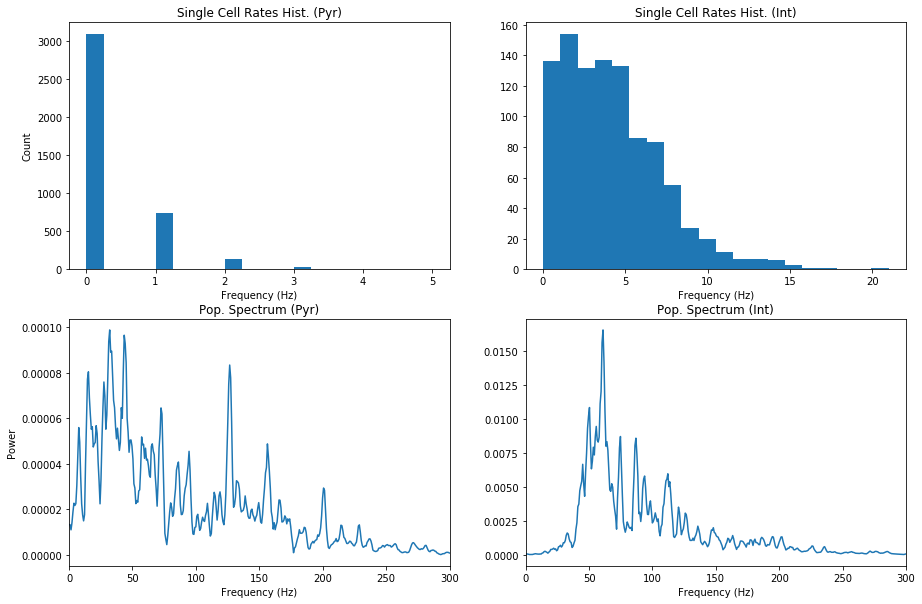

In [28]:
feats_dict = analyze_network(monitors_dict, PlotFlag=True) #We set PlotFlag to be True to have a visualization of some of the computed features.

In [32]:
feats_dict

{'AvgCellRate_Int': 4.469 * hertz,
 'AvgCellRate_Pyr': 284.25 * mhertz,
 'Harmonics_Int': 1,
 'Harmonics_Pyr': 2,
 'PkWidth_Int': 38.91109958 * hertz,
 'PkWidth_Pyr': 65.61479537 * hertz,
 'SynchFreqPow_Int': 0.016538371990067878,
 'SynchFreqPow_Pyr': 9.888762263045878e-05,
 'SynchFreq_Int': 61.03701895 * hertz,
 'SynchFreq_Pyr': 32.04443495 * hertz,
 'SynchMeasure_Int': 0.23299524919134013,
 'SynchMeasure_Pyr': 0.521320546854331}

* Reading from a raw data file of pre-simulated network and computing features:

In [8]:
rawfile = tables.open_file('Tutorial1_raw.h5', 'r')
print(rawfile) # This prints all the names and descriptions (shape) of the hdf5 file contents

# to access any of the stored variables, simply type the filename.root.<VariableName>.read()
# e.g.:
PopRateSig_Pyr = rawfile.root.PopRateSig_Pyr.read()
rawfile.close()

Tutorial1_raw.h5 (File) 'RawData'
Last modif.: 'Sun Mar  3 18:25:34 2019'
Object Tree: 
/ (RootGroup) 'RawData'
/IntInp (Array()) ''
/PopRateSig_Int (CArray(50000,)) ''
/PopRateSig_Pyr (CArray(50000,)) ''
/PyrInp (Array()) ''
/SpikeM_i_Int (CArray(4495,)) ''
/SpikeM_i_Pyr (CArray(1095,)) ''
/SpikeM_t_Int (CArray(4495,)) ''
/SpikeM_t_Pyr (CArray(1095,)) ''



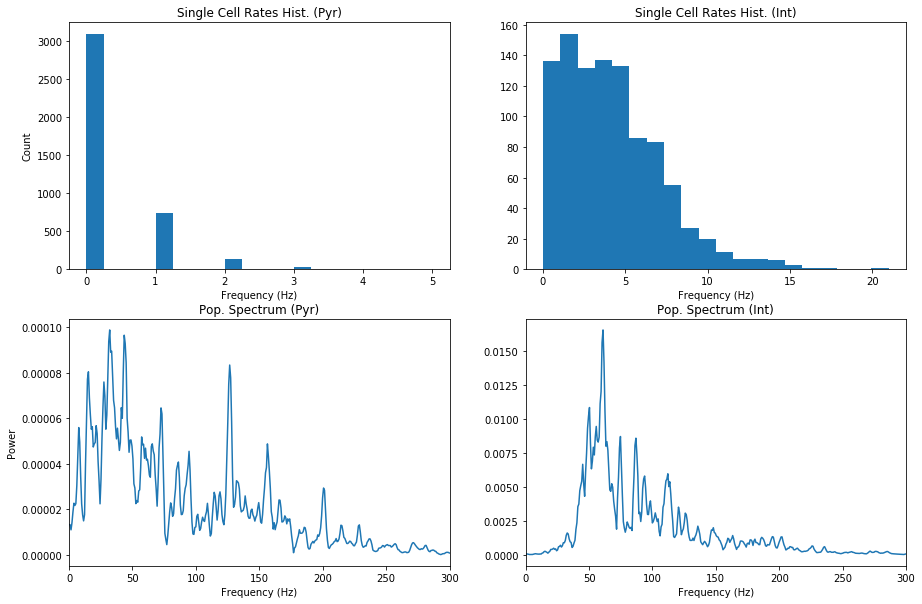

In [29]:
feats_dict = analyze_network('Tutorial1_raw.h5', PlotFlag=True)

* Simulating a network where inputs to the populations are inhomogenous Poisson signals:
To do this we create a function that takes a time vector as an input and outputs the Poisson signal and a dictionary containing features of this signal. See the example below:

In [4]:
def InhPois_sig(time_vect):
    DC_Inp = 1*kHz
    IPois_A = 2*kHz
    IPois_f = 10*Hz
    IPois_ph = 90.
    IPoisA_Type = 'ramp'
    IPois_phrad = IPois_ph*np.pi/180.
    params_dict = {'DC_Inp':DC_Inp,'IPois_A':IPois_A,'IPois_f':IPois_f,'IPois_ph':IPois_ph,'IPoisA_Type':IPoisA_Type,'IPois_phrad':IPois_phrad}
    
    if IPoisA_Type is 'ramp':
        IPois_A = np.linspace(0, IPois_A/kHz, len(time_vect))*kHz
    PoissRate = TimedArray(DC_Inp+IPois_A*np.cos(2*np.pi*IPois_f*time_vect+IPois_phrad), dt=defaultclock.dt)
    
    return PoissRate, params_dict


Setting up the network...
Running 200. ms simulation of the network...
Simulating 200. ms took 1.06122383277 minutes...


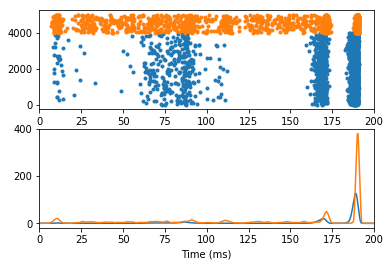

In [5]:
x = sim_network(PyrInp=InhPois_sig, IntInp=1, runtime=200, PlotFlag=True)

* For multiple simulations of different combinations of Pyramidal population inputs and Interneuronal population inputs, the functions 'run_multsim' and 'run_multsim_IP' can be used respectively. To analyze saved raw files resulting from such simulations the functions 'analyze_raw' and 'analyze_raw_modes' can be used. Please refer to the helping comments in each of the functions by typung the name of the function followed by '?' or help('functionname')

--------------------------------

* Extracting population rate signals from a saved simulation file and computing their multi-taper spectrograms:

WARNING    /storage2/abdallah/anaconda2/lib/python2.7/site-packages/spectrum/mtm.py:529: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, np.complex) or
 [py.warnings]
WARNING    /storage2/abdallah/anaconda2/lib/python2.7/site-packages/spectrum/mtm.py:530: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, np.complex))
 [py.warnings]
WARNING    /storage2/abdallah/anaconda2/lib/python2.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`

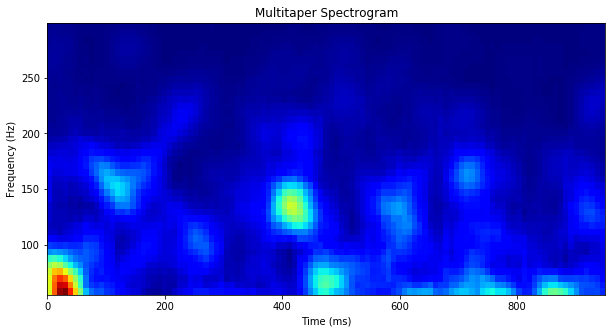

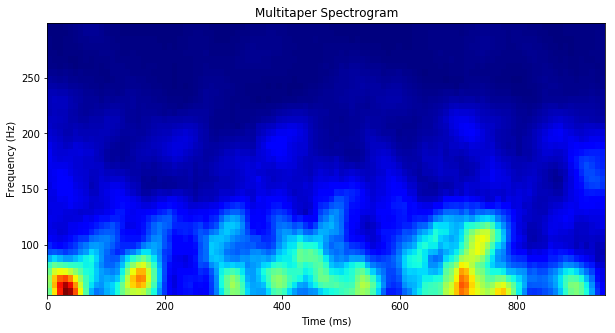

In [11]:
# Reading signals from hdf5 file:
rawfile = tables.open_file('Tutorial1_raw.h5', 'r')
PopRateSig_Pyr = rawfile.root.PopRateSig_Pyr.read()
PopRateSig_Int = rawfile.root.PopRateSig_Int.read()
rawfile.close()

# Computing and plotting multi-taper spectrograms corresponding to pyramidal population and interneuronal population respectively
# note that start_time parameter was specified, which is used here to crop the first 0.05s before calculating spectrograms. This is done because at first all neurons spike causing a huge increase in the signal that would disturb the plotted spectrograms.
fs = 1/(0.02e-3) # dt used for all simulations: 0.02 ms
MTS_Pyr, freq_vect = comp_mtspectrogram(PopRateSig_Pyr, fs=fs, freq_lowerlimit=50, freq_limit=300, W=2**12, NW=2.5, start_time=0.05, PlotFlag=True)
MTS_Int, freq_vect = comp_mtspectrogram(PopRateSig_Int, fs=fs, freq_lowerlimit=50, freq_limit=300, W=2**12, NW=2.5, start_time=0.05, PlotFlag=True)
